In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [4]:
rcParams['figure.figsize'] = 15,4

In [5]:
!gdown --id 152sWECukjvLerrVG2NUO8gtMFg83RKCF --output WISDM_ar_latest.tar.gz 
!tar -xvf WISDM_ar_latest.tar.gz

Downloading...
From: https://drive.google.com/uc?id=152sWECukjvLerrVG2NUO8gtMFg83RKCF
To: /content/WISDM_ar_latest.tar.gz
11.4MB [00:00, 43.2MB/s]
WISDM_ar_v1.1/
WISDM_ar_v1.1/readme.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw_about.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_transformed.arff
WISDM_ar_v1.1/WISDM_ar_v1.1_trans_about.txt


In [6]:
columns=['user_id','activity','timestamp','x_axis','y_axis','z_axis']
df=pd.read_csv('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt',header=None,names=columns)

In [7]:
df.head()

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [8]:
df.shape

(1098204, 6)

In [9]:
df.dtypes

user_id        int64
activity      object
timestamp      int64
x_axis       float64
y_axis       float64
z_axis        object
dtype: object

In [10]:
df.z_axis.replace(to_replace=r';',value='',regex=True,inplace=True)

In [11]:
df.z_axis=df.z_axis.astype('float64')

In [12]:
df.dtypes

user_id        int64
activity      object
timestamp      int64
x_axis       float64
y_axis       float64
z_axis       float64
dtype: object

In [13]:
df.head()

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [14]:
df.isnull().sum()

user_id      0
activity     0
timestamp    0
x_axis       0
y_axis       0
z_axis       1
dtype: int64

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.shape

(1098203, 6)

In [17]:
df.activity.value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [18]:
df.activity.value_counts().index

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

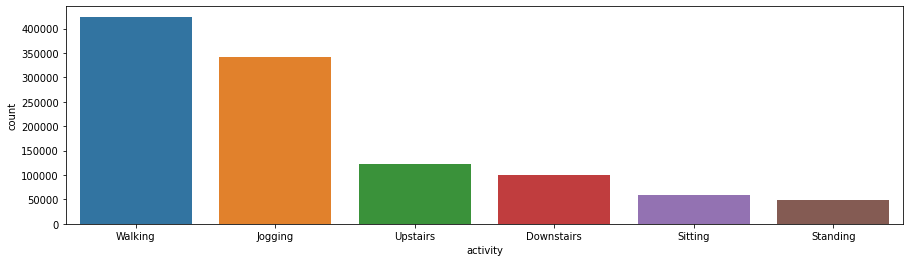

In [19]:
sns.countplot(x='activity',data=df,order=df.activity.value_counts().index)

In [20]:
df.user_id.value_counts()

20    56632
19    45383
31    44282
8     41188
29    38245
14    38192
13    37093
34    35947
32    35506
21    35436
3     35161
27    34958
10    34883
18    32811
12    32641
26    32578
36    32261
11    31658
7     30967
1     29978
6     29704
33    29453
5     28509
15    28154
24    25736
23    25673
30    25335
2     23525
35    22394
22    22310
17    22020
28    21358
16    20470
25    13468
9     12923
4     11371
Name: user_id, dtype: int64

In [21]:
df.user_id.value_counts().index

Int64Index([20, 19, 31,  8, 29, 14, 13, 34, 32, 21,  3, 27, 10, 18, 12, 26, 36,
            11,  7,  1,  6, 33,  5, 15, 24, 23, 30,  2, 35, 22, 17, 28, 16, 25,
             9,  4],
           dtype='int64')

Text(0.5, 1.0, 'records per user')

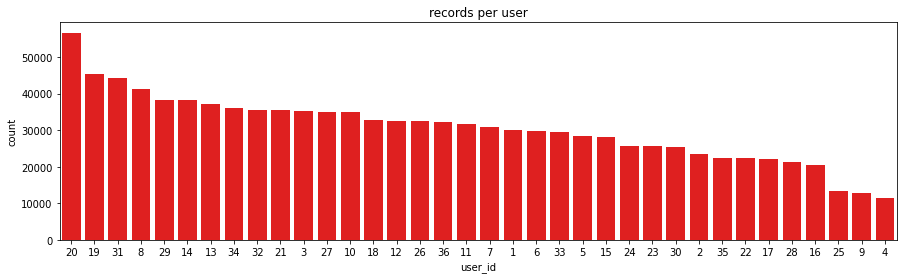

In [22]:
sns.countplot(x='user_id',data=df,order=df.user_id.value_counts().index,color='red')
plt.title('records per user')

In [23]:
df.head()

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [24]:
df.activity.unique()

array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

In [25]:
def activity_records(activity,df):
    return df[df.activity==activity][0:200]

In [26]:
l=['x_axis','y_axis','z_axis']

In [27]:
activity_records('Upstairs',df)[l[0]]

1161    10.119919
1162     4.862464
1163     9.466142
1164     5.747787
1165     2.301839
          ...    
1356     2.560625
1357     0.844462
1358     0.313268
1359     4.862464
1360     0.994285
Name: x_axis, Length: 200, dtype: float64

In [28]:
df[df.activity=='Jogging'][['x_axis','y_axis','z_axis']][0:200]

,x_axis,y_axis,z_axis
0,-0.694638,12.680544,0.503953
1,5.012288,11.264028,0.953424
2,4.903325,10.882658,-0.081722
3,-0.612916,18.496431,3.023717
4,-1.184970,12.108489,7.205164
...,...,...,...
195,-0.953424,17.052675,4.481094
196,3.296124,4.290410,0.081722
197,-6.510526,18.115063,-5.856750
198,5.979332,10.501288,7.123442


In [29]:
def plot_activity(activity,df):
    df1=df[df.activity==activity][['x_axis','y_axis','z_axis']][0:200]
    df1.plot(subplots=True,figsize=(15,10),title=activity)

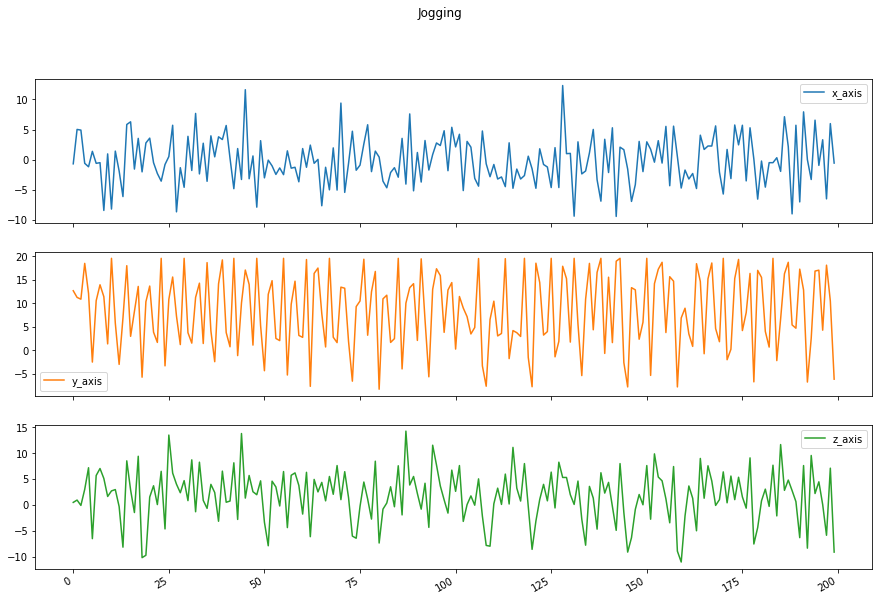

In [30]:
plot_activity('Jogging',df)

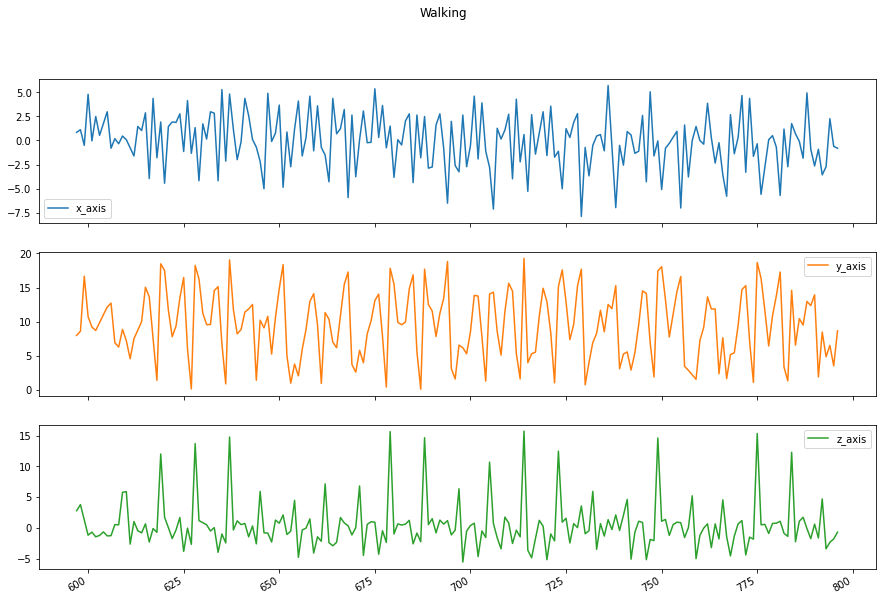

In [31]:
plot_activity('Walking',df)

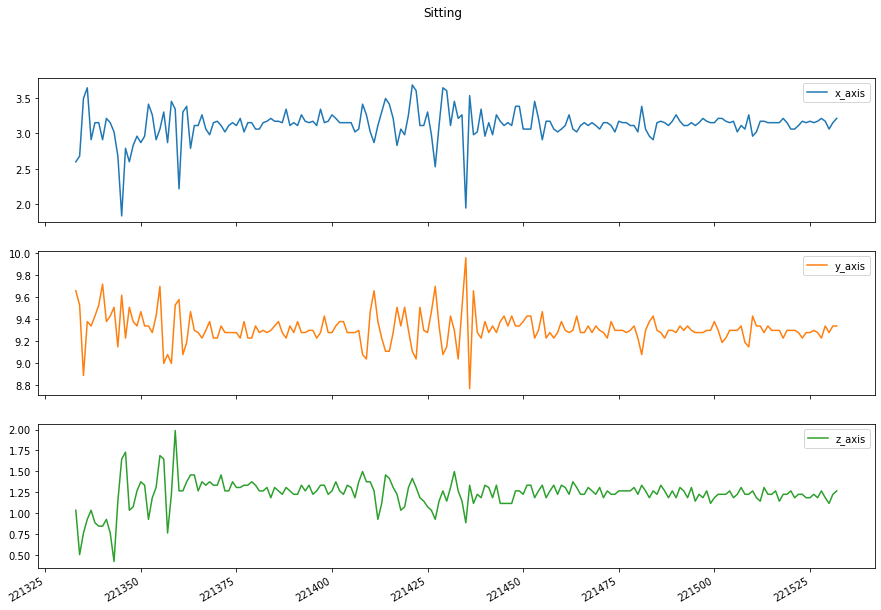

In [32]:
plot_activity('Sitting',df)

In [33]:
df.head()

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [34]:
df[['x_axis','y_axis','z_axis']]

,x_axis,y_axis,z_axis
0,-0.694638,12.680544,0.503953
1,5.012288,11.264028,0.953424
2,4.903325,10.882658,-0.081722
3,-0.612916,18.496431,3.023717
4,-1.184970,12.108489,7.205164
...,...,...,...
1098199,9.000000,-1.570000,1.690000
1098200,9.040000,-1.460000,1.730000
1098201,9.080000,-1.380000,1.690000
1098202,9.000000,-1.460000,1.730000


In [35]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
df.loc[:,['x_axis','y_axis','z_axis']]=rs.fit_transform(df[['x_axis','y_axis','z_axis']].to_numpy())

In [36]:
df.head()

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.131961,0.566215,0.102015
1,33,Jogging,49106062271000,0.648740,0.397381,0.193001
2,33,Jogging,49106112167000,0.633834,0.351926,-0.016543
3,33,Jogging,49106222305000,-0.120782,1.259408,0.612089
4,33,Jogging,49106332290000,-0.199038,0.498032,1.458535


In [37]:
df_train=df[df.user_id<=28]
df_test=df[df.user_id>28]

In [38]:
df_train.shape

(834780, 6)

In [39]:
df_test.shape

(263423, 6)

In [40]:
stats.mode(df_train.activity.iloc[1:10])[0][0]

'Walking'

In [41]:
def create_dataset(x,y,ts,s):
    xs=[]
    ys=[]
    for i in range(0,len(x)-ts,s):
        v=x.iloc[i:i+ts].values
        l=y.iloc[i:i+ts]
        xs.append(v)
        ys.append(stats.mode(l)[0][0])
    return np.array(xs),np.array(ys).reshape(-1,1)

In [42]:
ts=200;
s=40;
x_train,y_train=create_dataset(df_train[['x_axis','y_axis','z_axis']],df_train.activity,ts,s)
x_test,y_test=create_dataset(df_test[['x_axis','y_axis','z_axis']],df_test.activity,ts,s)

In [43]:
x_train.shape

(20865, 200, 3)

In [44]:
y_train.shape

(20865, 1)

In [45]:
x_train[0:5]

array([[[ 4.13207387e-02,  2.23676996e-01, -1.07529059e-01],
        [-3.69357045e-02,  2.69132300e-01, -1.15800526e-01],
        [-6.86109316e-02,  2.28547199e-01, -1.40614919e-01],
        ...,
        [ 1.04671204e-01, -5.19841359e-01, -1.02014749e-01],
        [ 1.88517387e-01, -6.85354470e-02,  7.05831781e-01],
        [ 2.35098605e-01,  4.93161859e-01,  1.10837652e+00]],

       [[ 1.62431902e-01,  7.27005959e-02,  4.49416316e-01],
        [ 1.73611395e-01, -5.22271752e-03,  4.65959291e-01],
        [ 2.92859316e-01,  7.75707986e-02,  5.98302733e-01],
        ...,
        [ 3.29270862e-04, -4.20813826e-01,  1.07529059e-01],
        [ 9.11457866e-01,  9.41220977e-01,  1.07804777e+00],
        [ 2.51867825e-01,  4.02251371e-01, -4.79745040e-01]],

       [[ 2.40688345e-01,  7.39919070e-01, -2.20572429e-02],
        [ 2.92859316e-01, -1.74056615e-01, -5.18345202e-01],
        [-1.46867373e-01,  3.21156138e-02,  8.27146640e-03],
        ...,
        [ 5.49987633e-01,  5.48357569e-01,

In [46]:
y_train

array([['Walking'],
       ['Walking'],
       ['Walking'],
       ...,
       ['Sitting'],
       ['Sitting'],
       ['Sitting']], dtype='<U10')

In [47]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [48]:
print(x_train.shape, y_train.shape)

(20865, 200, 3) (20865, 6)


In [49]:
y_train

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [50]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128,
          input_shape=[x_train.shape[1], x_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['acc']
)

In [54]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
294/294 [==============================] - 7s 23ms/step - loss: 0.2645 - acc: 0.9127 - val_loss: 1.1339 - val_acc: 0.7595
Epoch 2/20
294/294 [==============================] - 7s 22ms/step - loss: 0.3739 - acc: 0.8699 - val_loss: 1.3893 - val_acc: 0.7623
Epoch 3/20
294/294 [==============================] - 7s 23ms/step - loss: 0.2801 - acc: 0.9028 - val_loss: 0.9577 - val_acc: 0.8002
Epoch 4/20
294/294 [==============================] - 7s 23ms/step - loss: 0.2439 - acc: 0.9119 - val_loss: 1.6313 - val_acc: 0.7705
Epoch 5/20
294/294 [==============================] - 7s 24ms/step - loss: 0.2860 - acc: 0.9045 - val_loss: 0.6593 - val_acc: 0.8083
Epoch 6/20
294/294 [==============================] - 7s 23ms/step - loss: 0.2523 - acc: 0.9155 - val_loss: 2.0915 - val_acc: 0.7552
Epoch 7/20
294/294 [==============================] - 7s 22ms/step - loss: 0.2503 - acc: 0.9192 - val_loss: 1.4395 - val_acc: 0.7882
Epoch 8/20
294/294 [==============================] - 7s 23ms/step - 

In [56]:
model.evaluate(x_test, y_test)

206/206 [==============================] - 2s 10ms/step - loss: 1.0720 - acc: 0.7933


[1.0720022916793823, 0.7933444976806641]

In [57]:
x_test[0:5]

array([[[-0.13196138,  0.56621502,  0.10201475],
        [ 0.64873981,  0.39738117,  0.19300088],
        [ 0.63383379,  0.35192586, -0.01654293],
        ...,
        [-0.92756854,  1.21395268, -1.18557682],
        [ 0.78103042,  0.30647056,  1.44199225],
        [-0.11519215, -1.675704  , -1.84453704]],

       [[ 0.73817575, -0.49386691,  0.10752906],
        [-0.00526048, -0.85426228,  0.15440071],
        [-0.69652576,  1.38765673,  1.65153603],
        ...,
        [-0.18972209, -1.66596356, -2.00169474],
        [-0.2623888 ,  0.78537437,  0.36394451],
        [-0.38722644,  0.10029845, -0.27020121]],

       [[ 0.020825  , -1.93057819, -1.48886389],
        [-0.52510684,  0.36004291, -0.16267217],
        [-0.67602996,  0.45257676,  0.07720035],
        ...,
        [-1.21078235, -0.06853545,  0.86850397],
        [ 0.02641475, -0.62536251,  0.33361581],
        [-0.72261122,  1.36979917,  1.73700789]],

       [[-0.24561956, -1.86726552, -1.73700789],
        [-0.68720949,  1

In [58]:
y_pred=model.predict(x_test)

In [62]:
y_pred[0:5]

array([[2.7442854e-07, 9.9998939e-01, 9.7525815e-14, 2.2838309e-11,
        2.6703021e-06, 7.6451661e-06],
       [2.2807379e-07, 9.9997389e-01, 8.3383273e-13, 8.3890013e-11,
        1.2379339e-05, 1.3458715e-05],
       [4.9742977e-07, 9.9995387e-01, 7.7073365e-12, 3.9920400e-10,
        3.4018893e-05, 1.1631897e-05],
       [3.5183280e-07, 9.9996901e-01, 2.0423496e-12, 2.4690880e-10,
        1.5507232e-05, 1.5185847e-05],
       [3.0019028e-05, 9.9958235e-01, 3.4162695e-09, 8.0323780e-08,
        3.4263832e-04, 4.4828786e-05]], dtype=float32)

In [69]:
enc.inverse_transform(y_test[0:5])

array([['Jogging'],
       ['Jogging'],
       ['Jogging'],
       ['Jogging'],
       ['Jogging']], dtype='<U10')

In [68]:
enc.inverse_transform(y_pred[0:5])

array([['Jogging'],
       ['Jogging'],
       ['Jogging'],
       ['Jogging'],
       ['Jogging']], dtype='<U10')

In [70]:
from sklearn.metrics import confusion_matrix

In [74]:
enc.categories_[0]

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype='<U10')

[Text(0, 0.5, 'Downstairs'),
 Text(0, 1.5, 'Jogging'),
 Text(0, 2.5, 'Sitting'),
 Text(0, 3.5, 'Standing'),
 Text(0, 4.5, 'Upstairs'),
 Text(0, 5.5, 'Walking')]

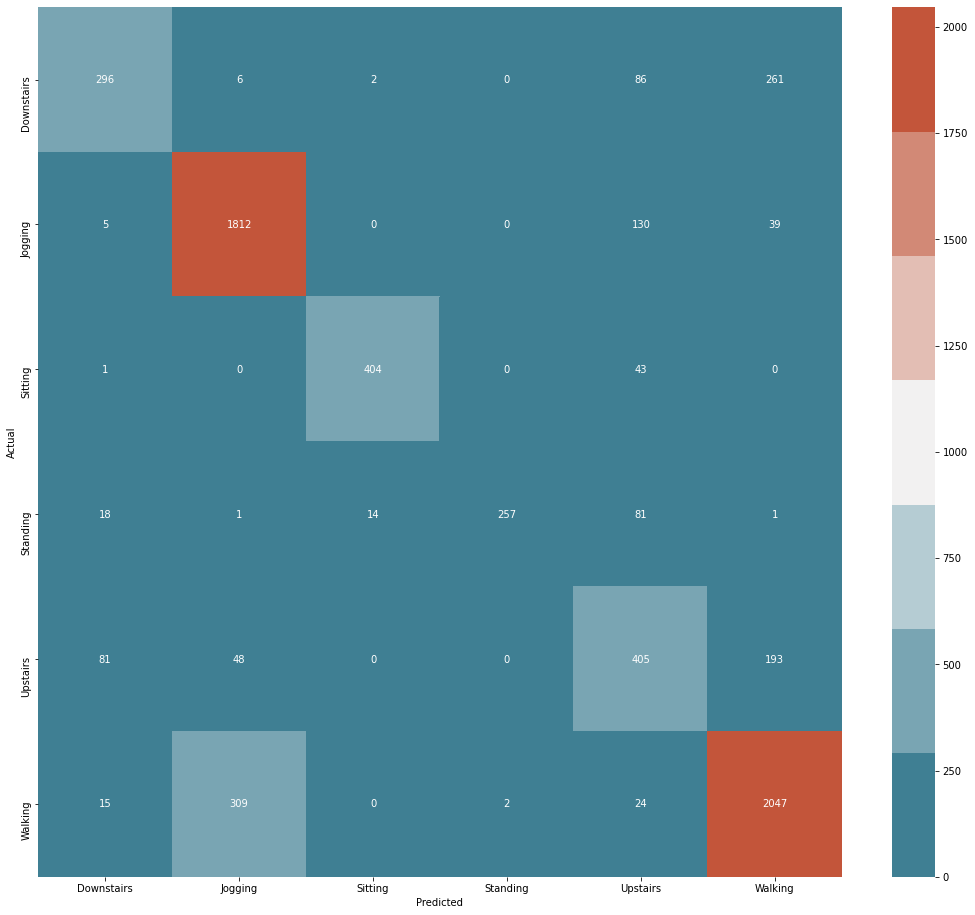

In [78]:
cm = confusion_matrix(enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=(18, 16)) 
ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(enc.categories_[0])
ax.set_yticklabels(enc.categories_[0])